In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [48]:
data = pd.read_csv('wine.csv')
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

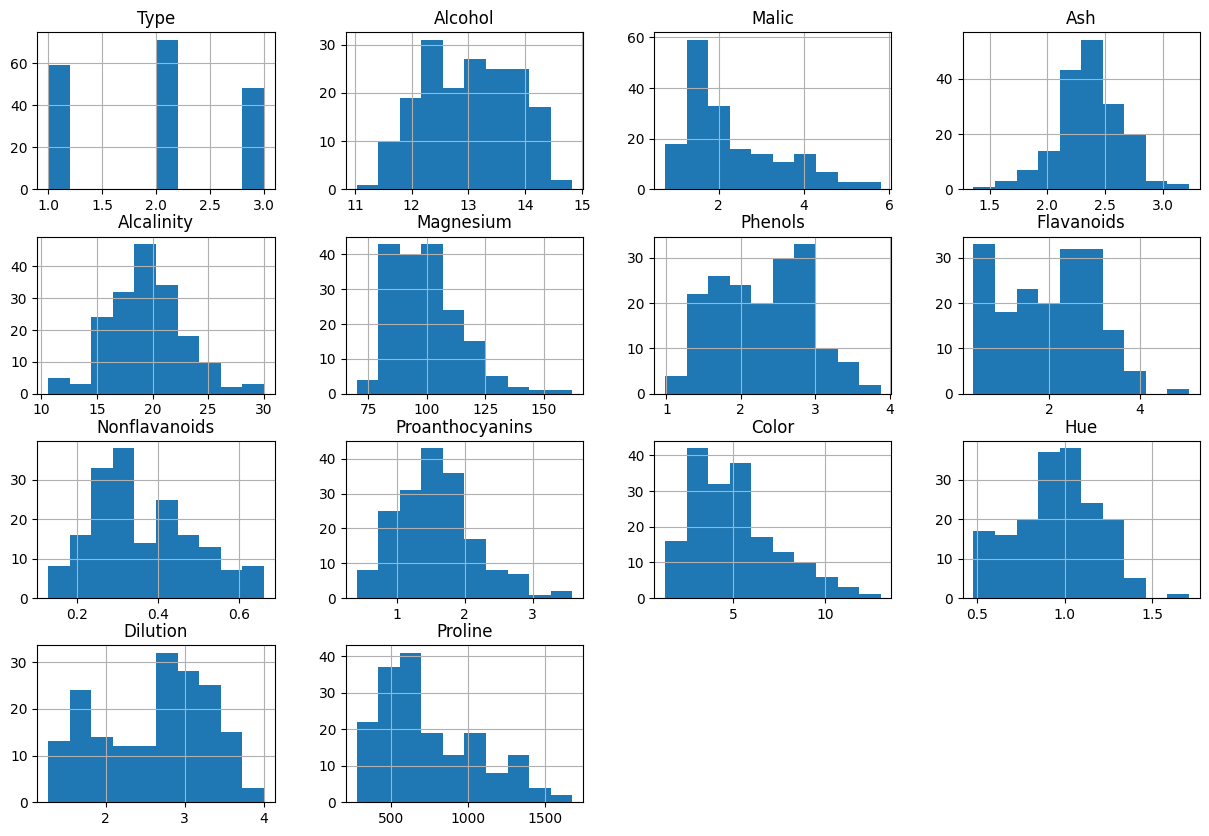

In [49]:
data.hist(figsize=(15, 10))
plt.show()

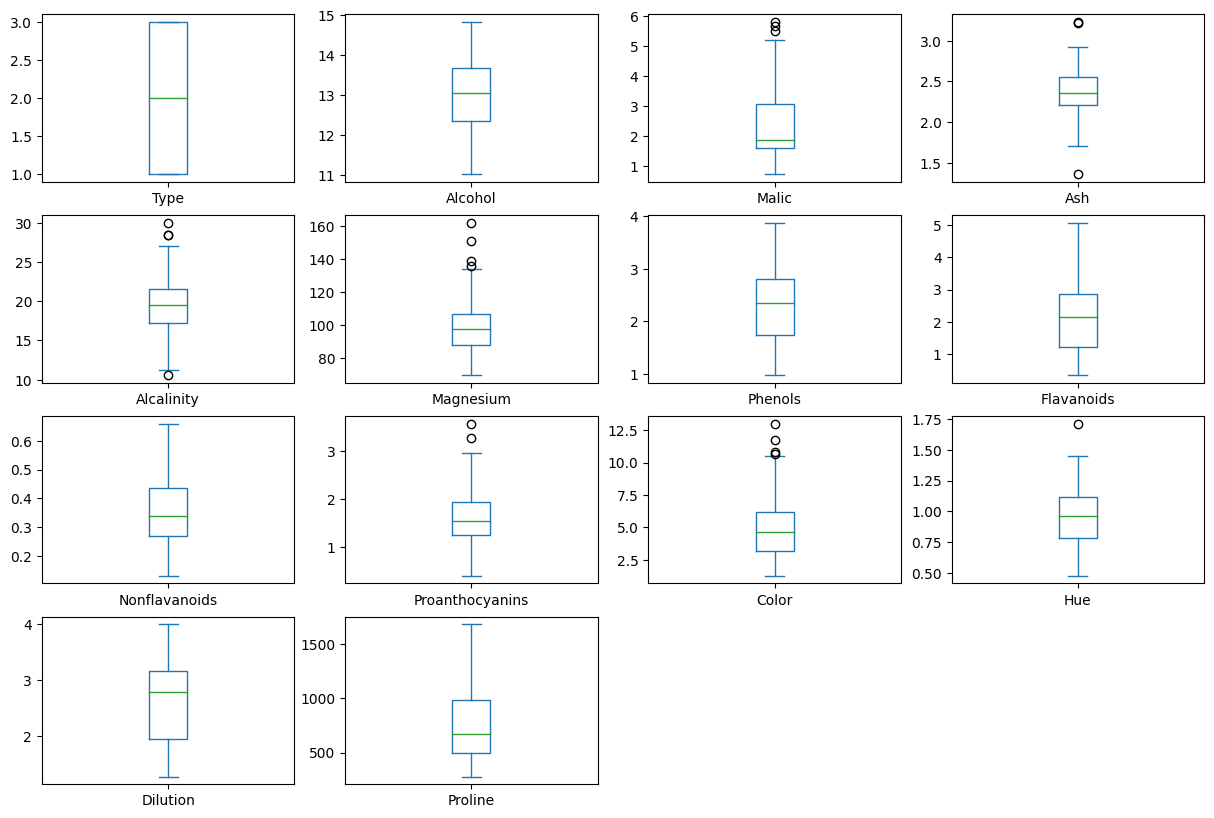

In [50]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

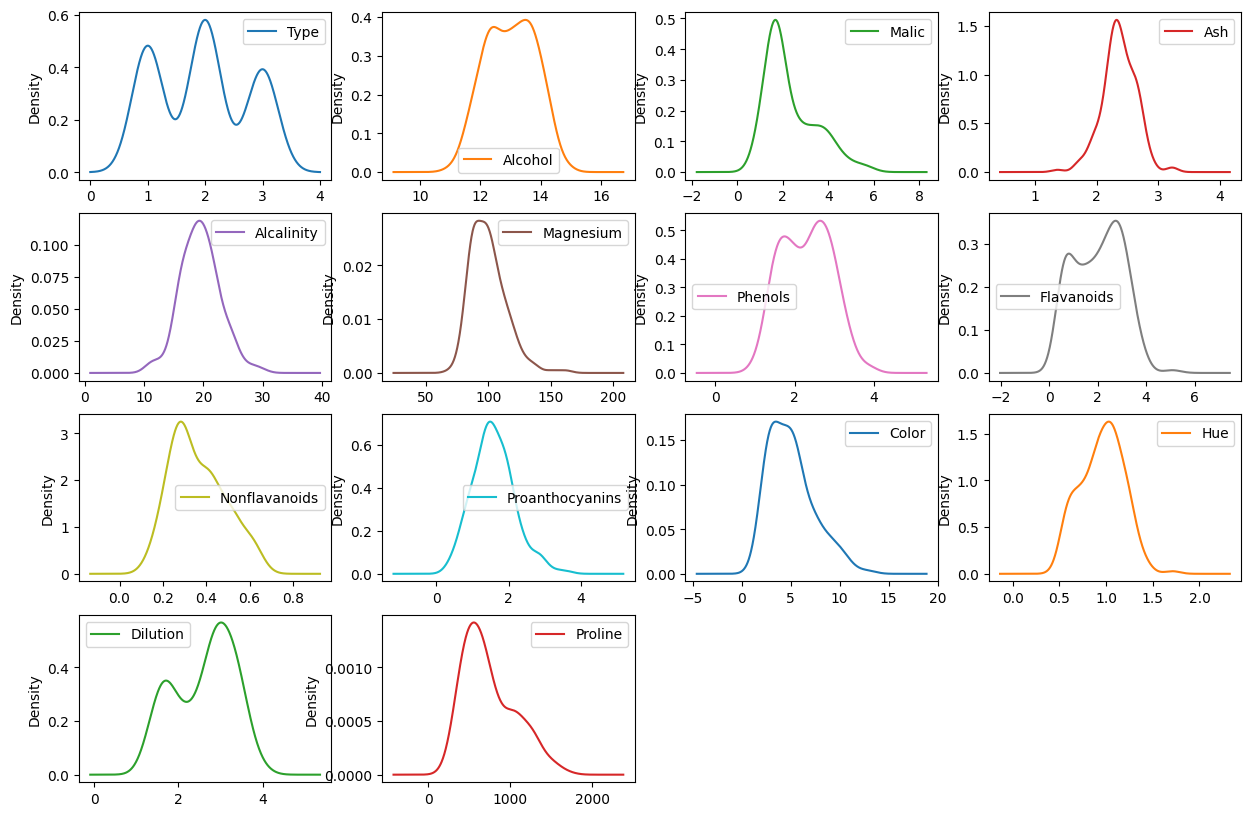

In [69]:
data.plot(kind='density', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False)
plt.show()

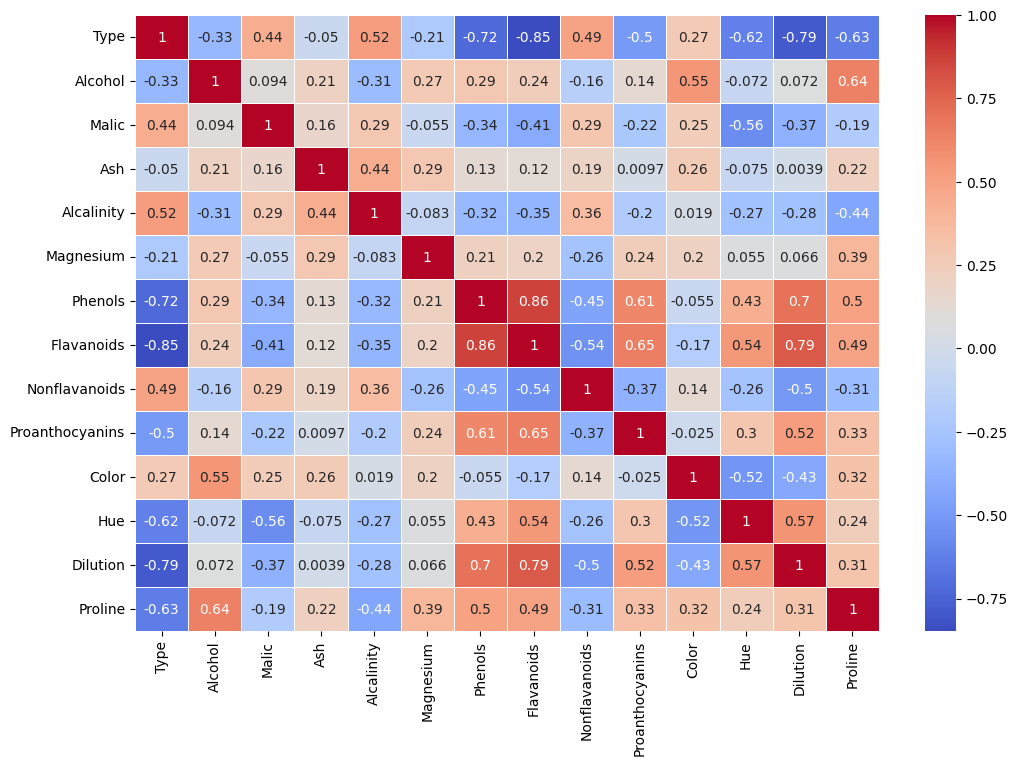

In [52]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [53]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [54]:
pca = PCA()
pca.fit(data_scaled)

PCA()

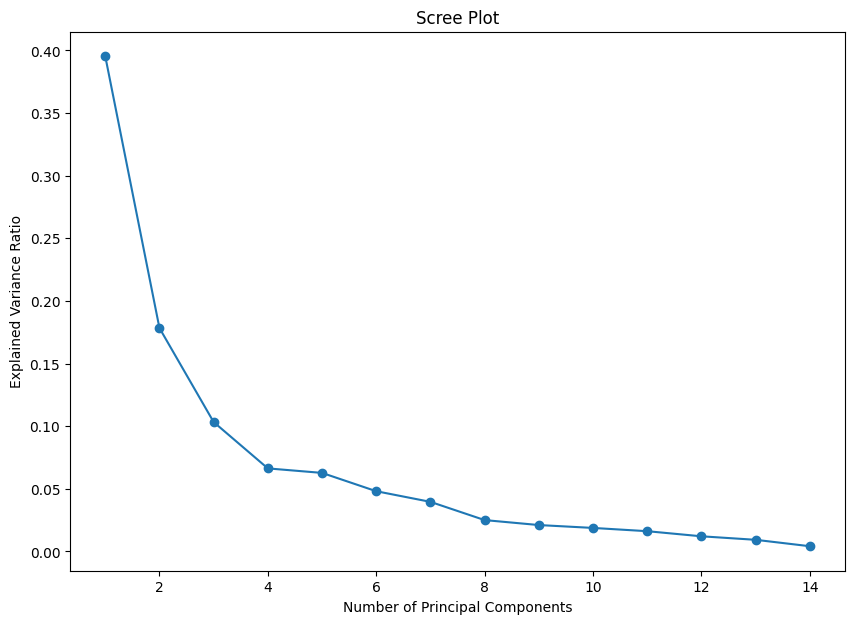

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

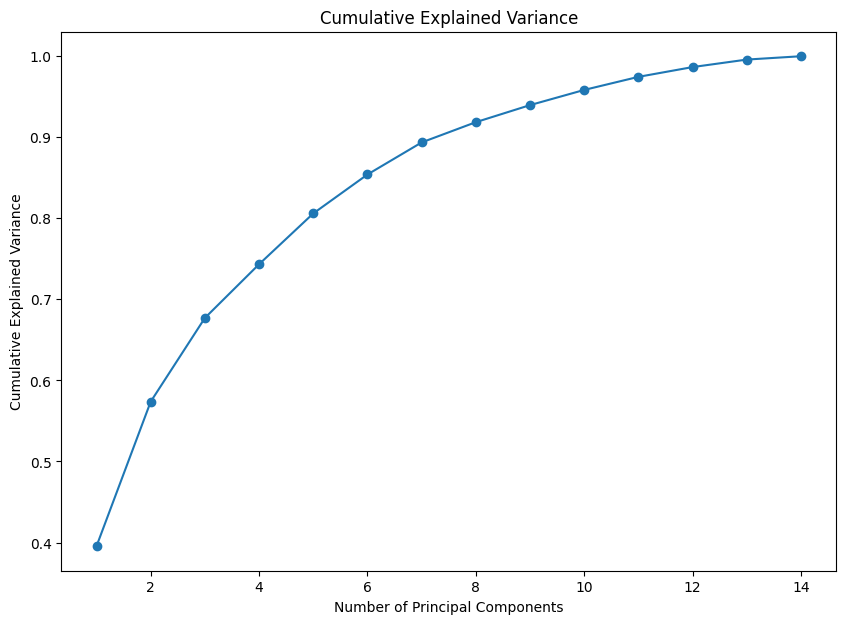

In [56]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [57]:
n_components = 2
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)


In [58]:

kmeans = KMeans(n_clusters=4, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


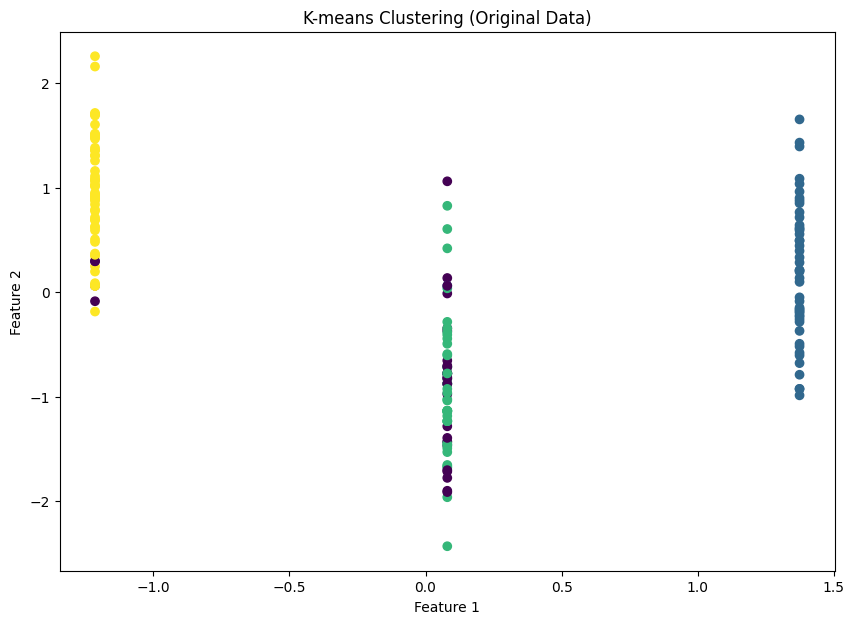

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_original, cmap='viridis')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [60]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_original = silhouette_score(data_scaled, clusters_original)
davies_bouldin_original = davies_bouldin_score(data_scaled, clusters_original)

In [61]:
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')

Silhouette Score (Original Data): 0.2712098178891813
Davies–Bouldin Index (Original Data): 1.7826351599706718


In [62]:
clusters_pca = kmeans.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
silhouette_pca = silhouette_score(data_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(data_pca, clusters_pca)

print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')


Silhouette Score (PCA Data): 0.5068315162238053
Davies–Bouldin Index (PCA Data): 0.6994672672434785


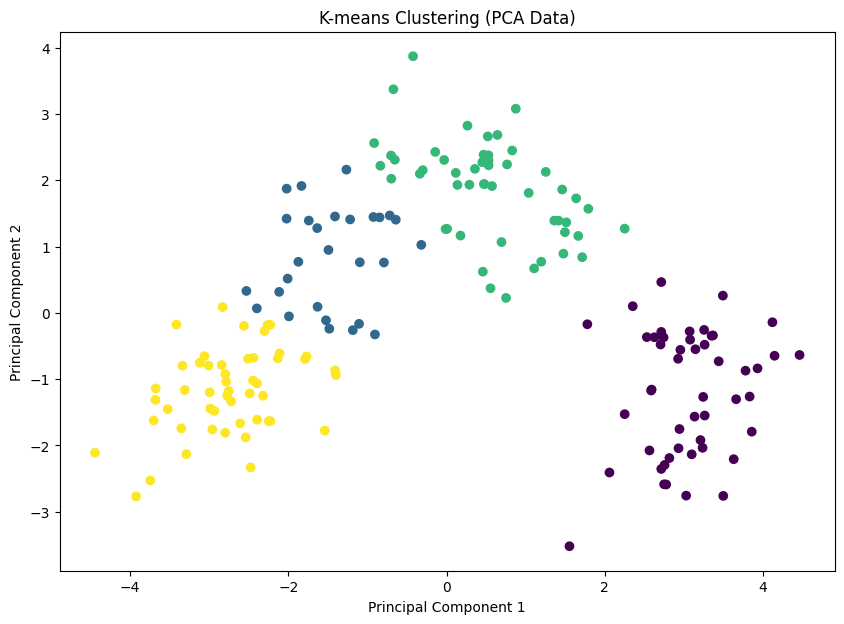

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [65]:
print(f'Silhouette Score Comparison: Original Data = {silhouette_original}, PCA Data = {silhouette_pca}')
print(f'Davies–Bouldin Index Comparison: Original Data = {davies_bouldin_original}, PCA Data = {davies_bouldin_pca}')


Silhouette Score Comparison: Original Data = 0.2712098178891813, PCA Data = 0.5068315162238053
Davies–Bouldin Index Comparison: Original Data = 1.7826351599706718, PCA Data = 0.6994672672434785
